<a href="https://colab.research.google.com/github/jjschueder/NLP/blob/main/JJS_Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4
## Joe Schueder



### 1.	Run one of the part-of-speech (POS) taggers available in Python. 
#### a.	Find the longest sentence you can, longer than 10 words, that the POS tagger tags correctly. Show the input and output.
#### b.	Find the shortest sentence you can, shorter than 10 words, that the POS tagger fails to tag 100 percent correctly. Show the input and output. Explain your conjecture as to why the tagger might have been less than perfect with this sentence.




In [ ]:
import matplotlib
matplotlib.use('Agg')
import pandas as pd
from nltk import pos_tag
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
import spacy
#https://www.openculture.com/2014/07/5-very-long-literary-sentences.html
longsentence = 'Its vanished trees, the trees that had made way for Gatsby’s house, had once pandered in whispers to the last and greatest of all human dreams; for a transitory enchanted moment man must have held his breath in the presence of this continent, compelled into an aesthetic contemplation he neither understood nor desired, face to face for the last time in history with something commensurate to his capacity for wonder.'
longsentence2 = 'I milked the cows, I churned the butter, I stored the cheese, I baked the bread, I brewed the tea, I washed the clothes, I dressed the children; the cat meowed, the dog barked, the horse neighed, the mouse squeaked, the fly buzzed, the goldfish living in a bowl stretched its jaws; the door banged shut, the stairs creaked, the fridge hummed, the curtains billowed up, the pot boiled, the gas hissed through the stove, the tree branches heavy with snow crashed against the roof; my heart beat loudly thud! thud!, tiny beads of water grew folds, I shed my skin…'

shortsentences = pd.read_csv(r"https://raw.githubusercontent.com/jjschueder/NLP/main/POS%20tagging%20train.csv")
short_sentence = 'Forest fire near La Ronge Sask. Canada'
#https://github.com/dipanjanS/text-analytics-with-python/blob/master/New-Second-Edition/Ch03%20-%20Processing%20and%20Understanding%20Text/Ch03b%20-%20Text%20Syntax%20and%20Understanding.ipynb

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


This displays labels for the POS codes.

In [ ]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [ ]:
# POS tagging with nltk
nltk_pos_tagged = nltk.pos_tag(nltk.word_tokenize(longsentence))
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag']).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77
Word,Its,vanished,trees,",",the,trees,that,had,made,way,for,Gatsby,’,s,house,",",had,once,pandered,in,whispers,to,the,last,and,greatest,of,all,human,dreams,;,for,a,transitory,enchanted,moment,man,must,have,held,his,breath,in,the,presence,of,this,continent,",",compelled,into,an,aesthetic,contemplation,he,neither,understood,nor,desired,",",face,to,face,for,the,last,time,in,history,with,something,commensurate,to,his,capacity,for,wonder,.
POS tag,PRP$,JJ,NNS,",",DT,NNS,WDT,VBD,VBN,NN,IN,NNP,NNP,NN,NN,",",VBD,RB,VBN,IN,NNS,TO,DT,JJ,CC,JJS,IN,DT,JJ,NNS,:,IN,DT,NN,VBN,NN,NN,MD,VB,VBN,PRP$,NN,IN,DT,NN,IN,DT,NN,",",VBD,IN,DT,JJ,NN,PRP,RB,VBD,CC,VBD,",",NN,TO,NN,IN,DT,JJ,NN,IN,NN,IN,NN,NN,TO,PRP$,NN,IN,NN,.


In [ ]:
#this cell was used to look through 7,600 short tweets to find one that was mistagged
#https://www.kaggle.com/flippedbit/pos-tagging-movie-titles
tagged_shorts = shortsentences['text'].str.split().map(pos_tag)
ts_df = pd.DataFrame(tagged_shorts)
#ts_df

In [ ]:
nltk_pos_tagged = nltk.pos_tag(nltk.word_tokenize(short_sentence))
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag']).T

,0,1,2,3,4,5,6,7
Word,Forest,fire,near,La,Ronge,Sask,.,Canada
POS tag,NNP,NN,IN,NNP,NNP,NNP,.,NNP


In [ ]:
nltk_pos_tagged
from nltk.chunk import RegexpParser

# illustrate NP chunking based on explicit chunk patterns
chunk_grammar = """
NP: {<DT>?<JJ>*<NN.*>}
"""
rc = RegexpParser(chunk_grammar)
c = rc.parse(nltk_pos_tagged)

In [ ]:
print(c)

(S
  (NP Forest/NNP)
  (NP fire/NN)
  near/IN
  (NP La/NNP)
  (NP Ronge/NNP)
  (NP Sask/NNP)
  ./.
  (NP Canada/NNP))


### 2.	Run a different POS tagger in Python. Process the same two sentences from question 1.
#### a.	Does it produce the same or different output?  
#### b.	Explain any differences as best you can.



In [ ]:
nlp = spacy.load('en_core_web_sm', parse=True, tag=True, entity=True)
sentence_nlp = nlp(longsentence)
# POS tagging with Spacy 
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type']).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76
Word,Its,vanished,trees,",",the,trees,that,had,made,way,for,Gatsby,’s,house,",",had,once,pandered,in,whispers,to,the,last,and,greatest,of,all,human,dreams,;,for,a,transitory,enchanted,moment,man,must,have,held,his,breath,in,the,presence,of,this,continent,",",compelled,into,an,aesthetic,contemplation,he,neither,understood,nor,desired,",",face,to,face,for,the,last,time,in,history,with,something,commensurate,to,his,capacity,for,wonder,.
POS tag,PRP$,JJ,NNS,",",DT,NNS,WDT,VBD,VBN,NN,IN,NNP,POS,NN,",",VBD,RB,VBN,IN,NNS,IN,DT,JJ,CC,JJS,IN,DT,JJ,NNS,:,IN,DT,NN,VBN,NN,NN,MD,VB,VBN,PRP$,NN,IN,DT,NN,IN,DT,NN,",",VBN,IN,DT,JJ,NN,PRP,CC,VBD,CC,VBN,",",VBP,IN,NN,IN,DT,JJ,NN,IN,NN,IN,NN,JJ,IN,PRP$,NN,IN,NN,.
Tag type,DET,ADJ,NOUN,PUNCT,DET,NOUN,DET,AUX,VERB,NOUN,ADP,PROPN,PART,NOUN,PUNCT,AUX,ADV,VERB,ADP,NOUN,ADP,DET,ADJ,CCONJ,ADJ,ADP,DET,ADJ,NOUN,PUNCT,ADP,DET,NOUN,VERB,NOUN,NOUN,VERB,AUX,VERB,DET,NOUN,ADP,DET,NOUN,ADP,DET,NOUN,PUNCT,VERB,ADP,DET,ADJ,NOUN,PRON,CCONJ,VERB,CCONJ,VERB,PUNCT,VERB,ADP,NOUN,ADP,DET,ADJ,NOUN,ADP,NOUN,ADP,PRON,ADJ,ADP,DET,NOUN,ADP,NOUN,PUNCT


In [ ]:
from spacy import displacy

displacy.render(sentence_nlp, jupyter=True, 
                options={'distance': 110,
                         'arrow_stroke': 2,
                         'arrow_width': 8})

In [ ]:
sentence_nlp = nlp(short_sentence)
# POS tagging with Spacy 
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type']).T

,0,1,2,3,4,5,6,7
Word,Forest,fire,near,La,Ronge,Sask,.,Canada
POS tag,NN,NN,IN,NNP,NNP,NNP,.,NNP
Tag type,NOUN,NOUN,SCONJ,PROPN,PROPN,PROPN,PUNCT,PROPN


In [ ]:
from spacy import displacy

displacy.render(sentence_nlp, jupyter=True, 
                options={'distance': 110,
                         'arrow_stroke': 2,
                         'arrow_width': 8})

### 3.	In a news article from this week’s news, find a random sentence of at least 10 words.
#### a.	Looking at the Penn tag set, manually POS tag the sentence yourself.
#### b.	Now run the same sentences through both taggers that you implemented for questions 1 and 2. Did either of the taggers produce the same results as you had created manually?
#### c.	Explain any differences between the two taggers and your manual tagging as much as you can.

In [ ]:
#https://www.usatoday.com/story/news/health/2021/06/04/pandemic-misery-hits-most-covid-halts-mission-impossible-filming/7527604002/
news_sentence = 'Although hardships have decreased, there are still people who reported at least one form of economic distress in March 2021.'

#### Placeholder for hand labeling

Add a picture of hand drawing
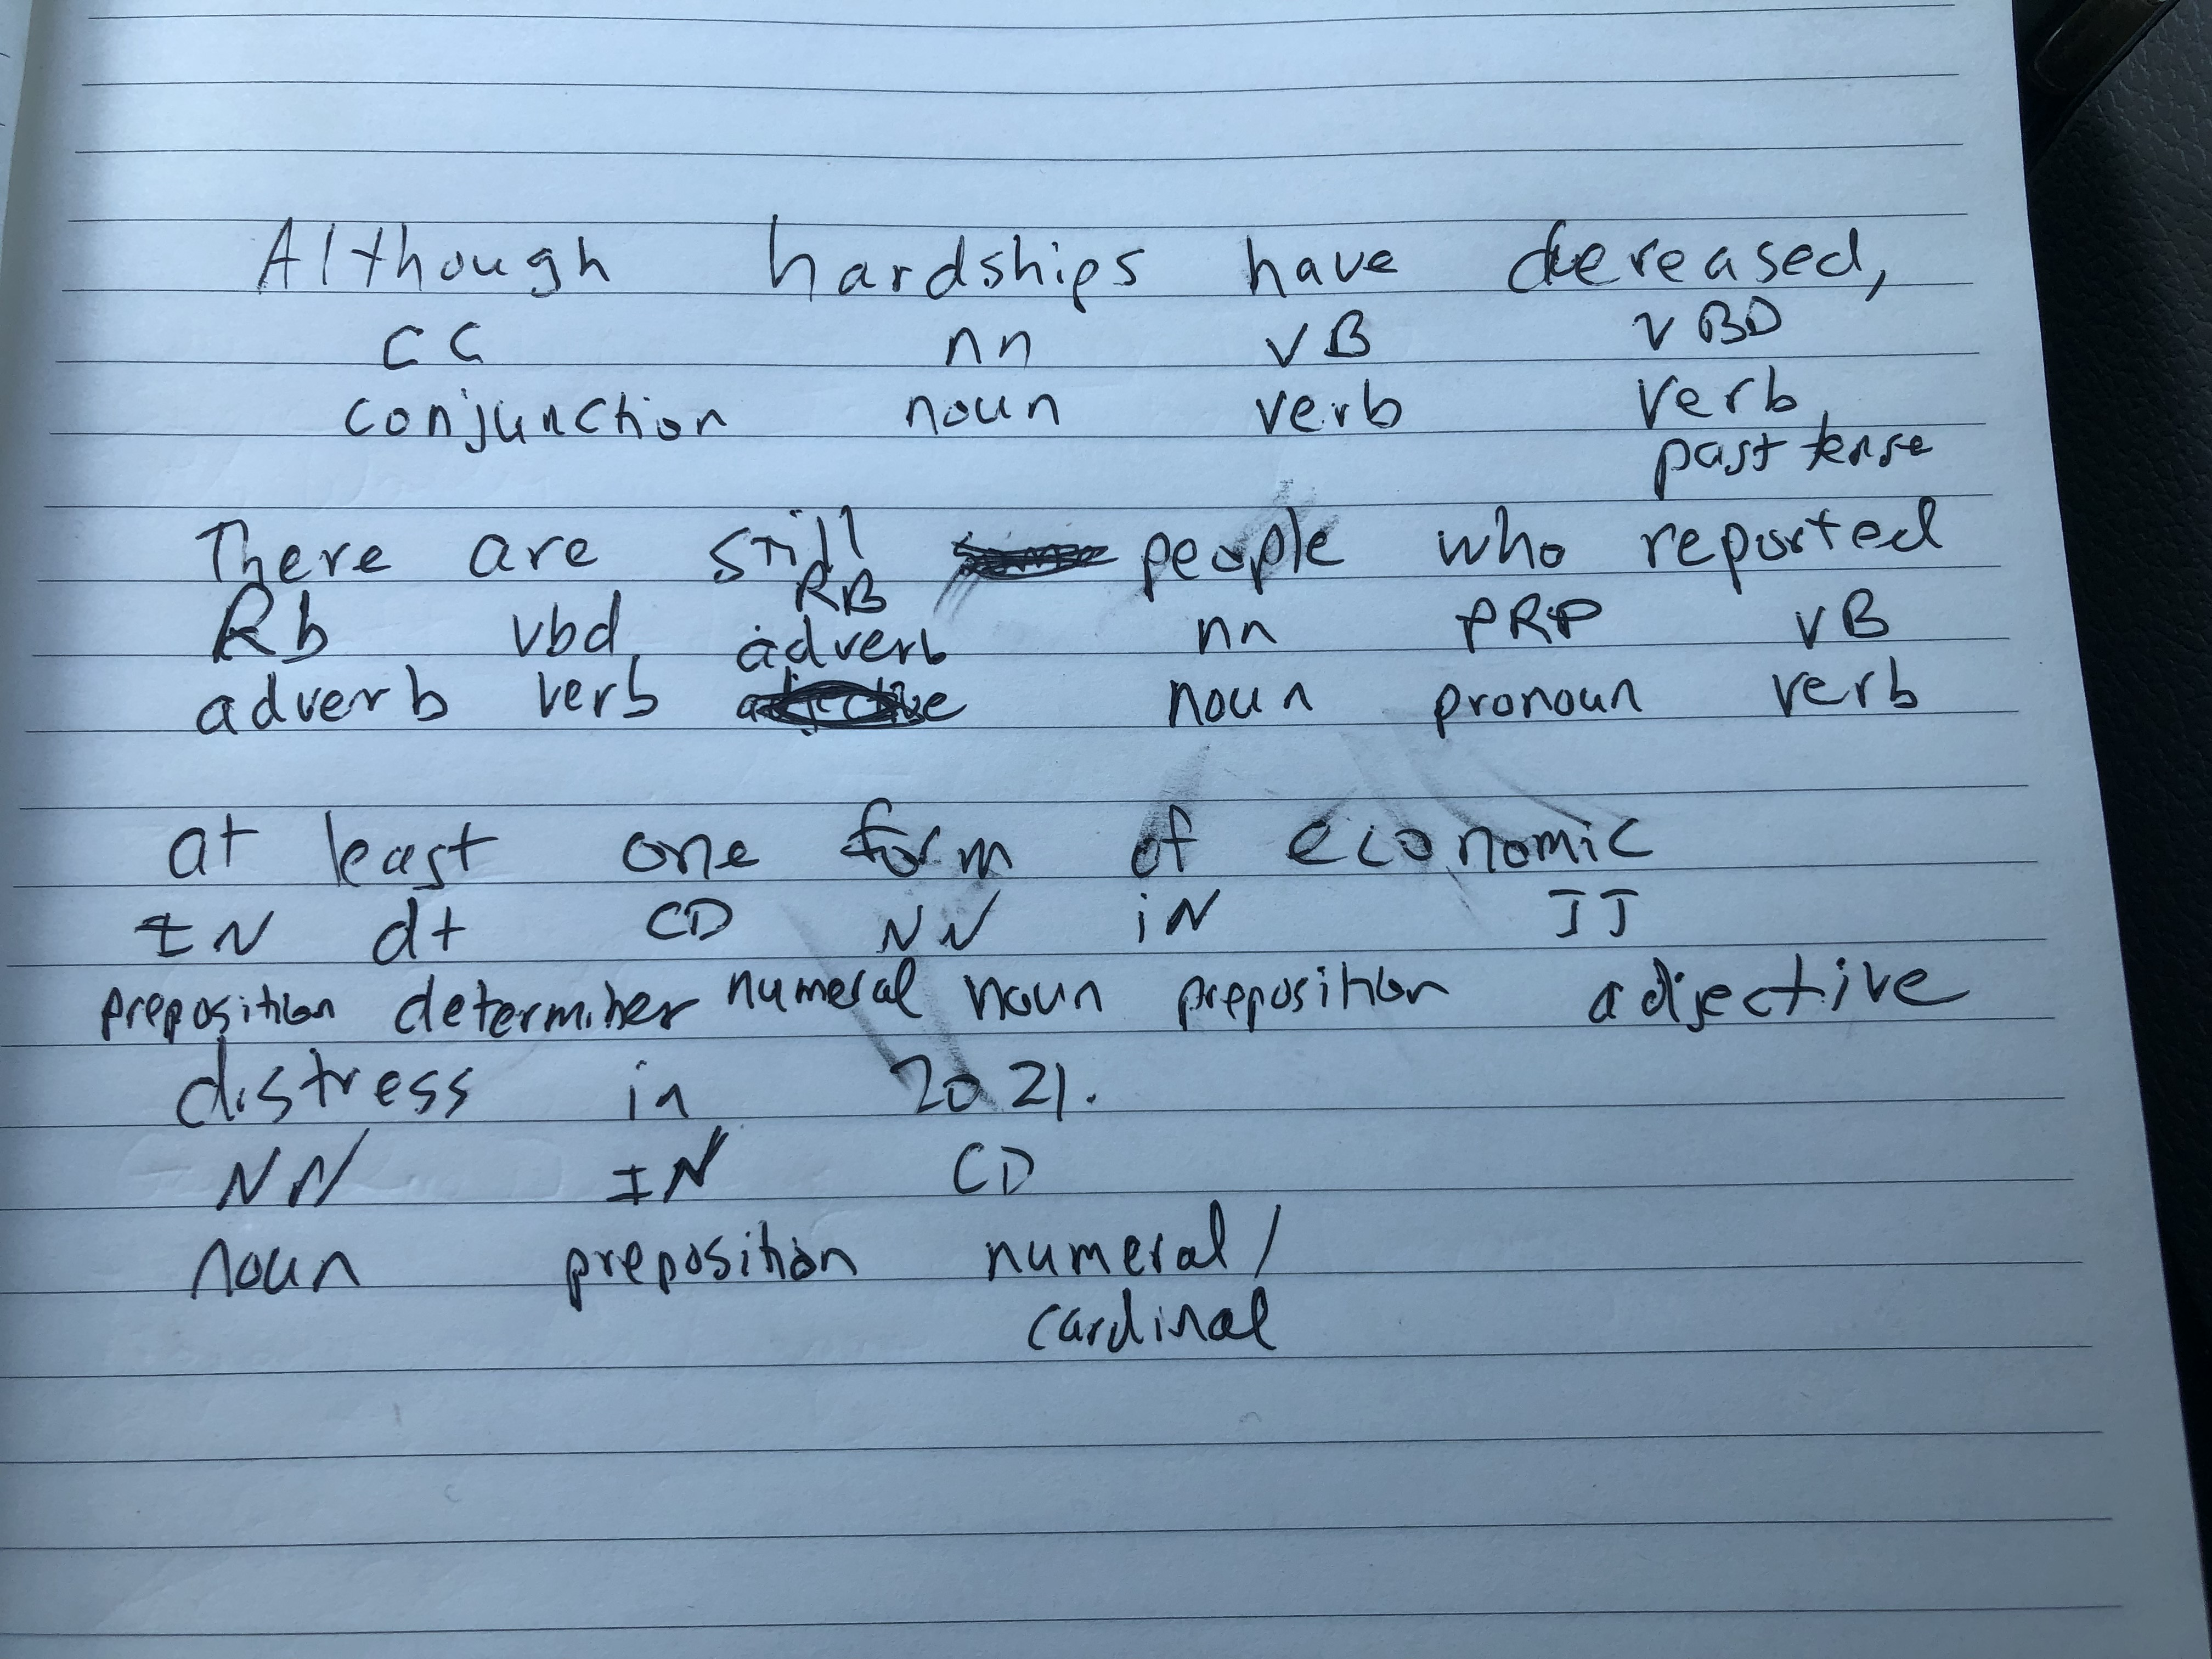

In [ ]:
# POS tagging with nltk
nltk_pos_tagged = nltk.pos_tag(nltk.word_tokenize(news_sentence))
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag']).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Word,Although,hardships,have,decreased,",",there,are,still,people,who,reported,at,least,one,form,of,economic,distress,in,March,2021,.
POS tag,IN,NNS,VBP,VBN,",",EX,VBP,RB,NNS,WP,VBD,IN,JJS,CD,NN,IN,JJ,NN,IN,NNP,CD,.


In [ ]:
## POS tagging with spacey
sentence_nlp = nlp(news_sentence)
# POS tagging with Spacy 
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type']).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Word,Although,hardships,have,decreased,",",there,are,still,people,who,reported,at,least,one,form,of,economic,distress,in,March,2021,.
POS tag,IN,NNS,VBP,VBN,",",EX,VBP,RB,NNS,WP,VBD,IN,RBS,CD,NN,IN,JJ,NN,IN,NNP,CD,.
Tag type,SCONJ,NOUN,AUX,VERB,PUNCT,PRON,AUX,ADV,NOUN,PRON,VERB,ADP,ADV,NUM,NOUN,ADP,ADJ,NOUN,ADP,PROPN,NUM,PUNCT
